#### Competition Description
The Challenge
Kaggle is launching a companion COVID-19 forecasting challenges to help answer a subset of the NASEM/WHO questions. While the challenge involves forecasting confirmed cases and fatalities between April 15 and May 14 by region, the primary goal isn't only to produce accurate forecasts. It’s also to identify factors that appear to impact the transmission rate of COVID-19.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import datetime as day_of_week

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test(1).csv")

## EDA

### Data Exploration
###### Examining the dataset to understand its structure, size, and the types of variables it contains.

In [3]:
df_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
df_train.tail(10)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
35985,35986,NaN,Zimbabwe,2020-05-06,34.0,4.0
35986,35987,NaN,Zimbabwe,2020-05-07,34.0,4.0
35987,35988,NaN,Zimbabwe,2020-05-08,34.0,4.0
35988,35989,NaN,Zimbabwe,2020-05-09,35.0,4.0
35989,35990,NaN,Zimbabwe,2020-05-10,36.0,4.0
35990,35991,NaN,Zimbabwe,2020-05-11,36.0,4.0
35991,35992,NaN,Zimbabwe,2020-05-12,36.0,4.0
35992,35993,NaN,Zimbabwe,2020-05-13,37.0,4.0
35993,35994,NaN,Zimbabwe,2020-05-14,37.0,4.0
35994,35995,NaN,Zimbabwe,2020-05-15,42.0,4.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35995 entries, 0 to 35994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              35995 non-null  int64  
 1   Province_State  15295 non-null  object 
 2   Country_Region  35995 non-null  object 
 3   Date            35995 non-null  object 
 4   ConfirmedCases  35995 non-null  float64
 5   Fatalities      35995 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


### Data Visualization

#### GIS - Geographic Information Systems

In [6]:
import plotly.graph_objects as go
from plotly.offline.offline import init_notebook_mode, iplot, plot

In [7]:
init_notebook_mode(connected=True)

In [8]:
# this code lead to a crash of the program thats why we show it
#chromomap=go.Figure(data=data,layout=layout)
# Dataiplot(chromomap,validate=False)

<img src="covid_map.png">

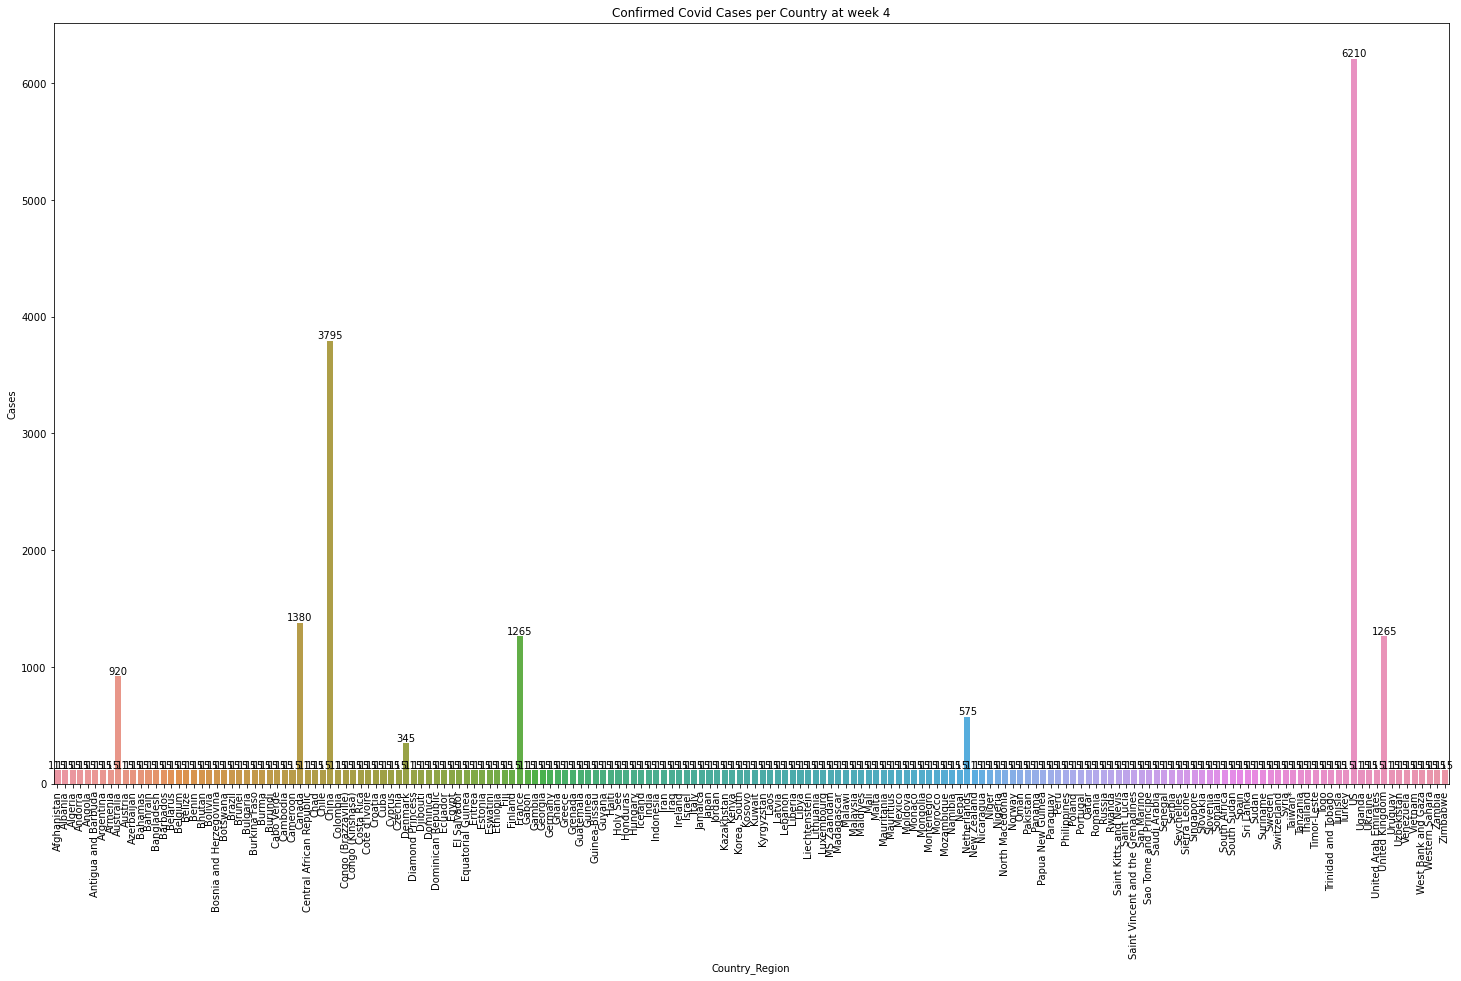

In [9]:
plt.figure(figsize=(25,14))
df_train.groupby("Country_Region")['ConfirmedCases'].sum().sort_values(ascending=False)
ax=sns.countplot(x=df_train['Country_Region'])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.title('Confirmed Covid Cases per Country at week 4')
plt.ylabel('Cases');

At week 4, most cases occured:

1-) USA 

2-) China 

3-) Canada

In [10]:
print("We have {} countries in total.".format(df_train['Country_Region'].nunique()))

We have 184 countries in total.


We've seperated date column into different columns. Then, we also name the day of the weeks so, we can easily know what day it will be.

In [11]:
df_train['Date']=pd.to_datetime(df_train['Date'])

df_train['day']=df_train['Date'].dt.dayofweek
df_train['month']=df_train['Date'].dt.month
df_train['year']=df_train['Date'].dt.year

df_train['weekday']=df_train['Date'].dt.day_name()
df_train['month']=df_train['Date'].dt.month_name()

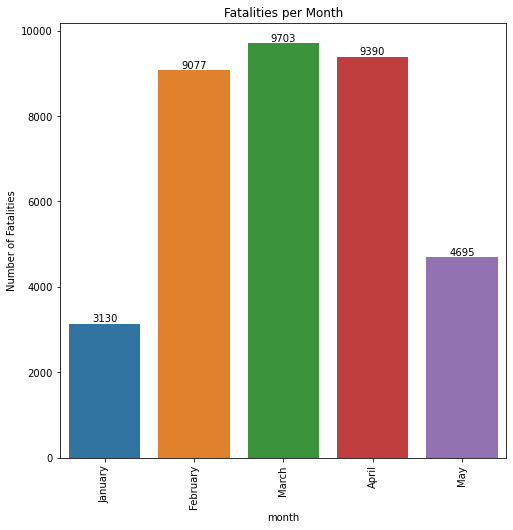

In [12]:
plt.figure(figsize=(8,8))
df_train.groupby("month")['Fatalities'].sum().sort_values(ascending=False)
ax=sns.countplot(x=df_train['month'])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.title('Fatalities per Month')
plt.ylabel('Number of Fatalities');

The most fatalities has been occured on March ==> 9703

### Data preprocessing
###### Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [13]:
#Those columns are not necessary anymore that's why we delete from dataset
df_train=df_train.drop(df_train[['Date','year']],axis=1)

In [14]:
#Change object values into the integer with getdummies
df_train_dummies=pd.get_dummies(df_train,drop_first=True)

In [15]:
df_train_dummies.shape,df_train.shape

((35995, 329), (35995, 8))

In [17]:
#Defining x and y values, in this case our targets are confirmed cases
x=df_train_dummies.iloc[:,3:]
y=df_train['ConfirmedCases']

### Data modeling
###### Creating models to make predictions or classify the data.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [20]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [21]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Extra Tree,0.893414,6500.561367,1182.505464
XGradientBooting,0.870826,7156.305209,2370.553533
Gradient Boosting,0.744328,10067.981624,3323.247579
Ridge,0.439031,14913.173650,5777.084998
Lasso,0.438997,14913.621163,5759.560447
Linear,0.437887,14928.373157,5815.664189
ElasticNet,0.024459,19666.331195,5884.240933


In [22]:
x1=df_train_dummies.drop('Fatalities',axis=1)
y1=df_train['Fatalities']

In [23]:
algo_test(x1,y1)

,R_Squared,RMSE,MAE
XGradientBooting,0.997603,87.839237,15.746587
Extra Tree,0.996165,111.094016,14.767190
Gradient Boosting,0.978954,260.269607,50.808133
Ridge,0.868996,649.347010,200.250158
Linear,0.868680,650.130604,198.373657
Lasso,0.855202,682.678164,204.368116
ElasticNet,0.808141,785.826367,188.388940
